# Exploratory Data Analysis for Final Project

In [ ]:
## 1. A Brief Summary of the Topic and 7. Describe the Research Question / Plan for Data Analysis:
##
## For my final project, I will use UC Berkeley's Transportation Injury Mapping System (TIMS) dataset to map the
## locations of bike and pedestrian collisions in the City of Oakland over a five year period. I plan to use two
## additional datasets (2022 5-year ACS at the census tract level and open street map roadways) to understand:
##      A) the demographic make-up of neighborhoods in Oakland that experience higher rates of bike and pedestrian
##         collisions
##      B) the street design characteristics of high frequency collision locations (are speed limits, number of lanes, intersections,
##         presence of a bike facility, or proximity to highway off-ramps a predictor of bike and pedestrian collisions?)


## My data analysis will consist of three parts:
## 1.) Quick snap shot of the data during the study period including a bar chart of collision counts each year, a pie chart
## of collision severity, and summaries of bike and pedestrian collision victim demographics (age, gender, etc).
## 2.) Geocode bike and pedestrian collisions and summarize at the census tract level. When normalizing by population,
## are some neighborhoods experiencing higher rates of bike and pedestrian collisions than others? What are the demographic
## characteristics of neighborhoods in Oakland where there are more collisions?
## 3.) Use open street map data to understand street design elements of collision hot spots. This part of the analysis will
## involve geocoding collisions, then buffering open street map roadway edges to understand where collision densities are 
## occuring on the network. From there, I will try to identify which roadway characteristics are the most common. For example
## my hypothesis is that bike and pedestrian collisions occur more frequently at intersections and on arterial roadways
## with high speed limits, > 2 travel lanes, and no bike facility. My idea, though maybe too ambitious, is to understand
## where in Oakland might we be able to predict bike and pedestrian collisions before they happen.

## I'm not sure if my proposal here is too ambitious given the timeline, however, my main goal is to create a helpful
## summary of bike and pedestrian collision history for a city that enables active transportation planners to more
## easily write existing conditions chapters in active transportation plans or collision history sections of atp grants.
## I'm hoping to take the existing summary that TIMS provides on their website a step further by pulling out interesting
## information that more directly ties to the development of bike and pedestrian infrastructure recommendations.

In [11]:
## 2. Access Two or More Data Sets

## Dataset 1: TIMS
## From the TIMS website, I queried all bike and pedestrian collisions that occured in the City of Oakland between
## 2018 and 2022.
import pandas as pd
tims = pd.read_csv('assignment_4_data/Crashes.csv')
tims.head()

## Dataset 2: US Census ACS 5-year
import requests
import json
endpoint_url = 'https://api.census.gov/data/2022/acs/acs5?get=NAME,B19013_001E&for=tract:*&in=state:06+county:001&key=d64e2b1b465e55166c9c5df968bf2c2df503c7b6'
pd.read_json(endpoint_url).head()

,0,1,2,3,4
0,NAME,B19013_001E,state,county,tract
1,Census Tract 4001; Alameda County; California,234236,06,001,400100
2,Census Tract 4002; Alameda County; California,225500,06,001,400200
3,Census Tract 4003; Alameda County; California,164000,06,001,400300
4,Census Tract 4004; Alameda County; California,158836,06,001,400400


In [17]:
## 3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.

len(tims.index)

tims_for_geocode = tims[tims['POINT_X'].notna()]
len(tims_for_geocode)

## NOTE: after viewing the data, I'm realizing that there are four geography columns (lat/Long and Point_X/Point_Y)
## I will need to combine these into two columns rather than simply removing NULL values


1980

In [23]:
## 4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or
## statistical summaries of your data.

collision_severity = tims_for_geocode.groupby('COLLISION_SEVERITY').size()
collision_severity.head()


COLLISION_SEVERITY
1      61
2     227
3     547
4    1145
dtype: int64

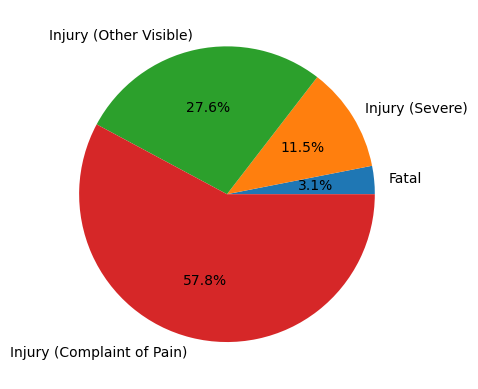

In [29]:
## 5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data
## and highlight any notable patterns.


## Pie Chart of Collision Severity
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

severity_labels = ['Fatal', 'Injury (Severe)', 'Injury (Other Visible)', 'Injury (Complaint of Pain)']

plt.pie(collision_severity, labels = severity_labels, autopct = '%1.1f%%')
plt.show()

<Axes: xlabel='VICTIM_SEX', ylabel='count'>

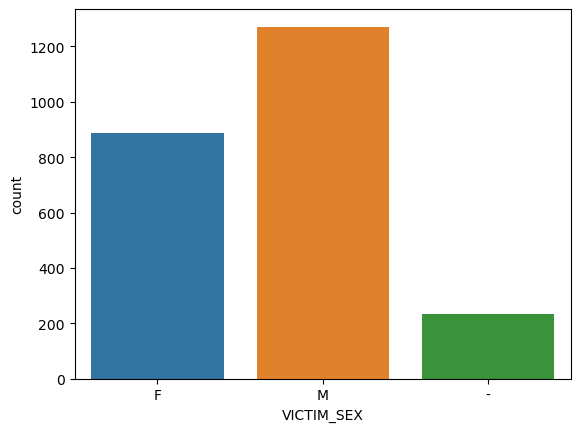

In [48]:
## Bar Chart of Collisions by Gender

victims = pd.read_csv('assignment_4_data/Victims.csv')


sns.countplot(data = victims, x= 'VICTIM_SEX')


In [ ]:
## 6. Include a short written analysis of your interpretation of the data.

## The pie chart above shows the percentage of each collision severity type during the five year study period.
## The majority of bike and pedestrian collisions (57%) resulted in injury (complaint of pain). 3.1% of all bike
## and pedestrian collisions resulted in a fatality.
## 
## The bar chart above shows bike and pedestrian collision counts by gender. During the five year study period,
## men outnumbered women in reported collision invovlement.